In [ ]:
import pyodbc
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [ ]:
cnxn_str= ("Driver={ODBC Driver 17 for SQL Server};"
"Server=LAPTOP-96JDO3JG;"
"Database=Feedback_DW;"
"Trusted_Connection=yes;")

In [ ]:
cnxn = pyodbc.connect(cnxn_str)

In [ ]:
cursor = cnxn.cursor()

In [ ]:
FeedbackSummary=pd.read_sql("Select * from dbo.feedback_summary ", pyodbc.connect(cnxn_str))
FeedbackSummary

C:\Users\nourh\AppData\Local\Temp\ipykernel_15504\3533093968.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  FeedbackSummary=pd.read_sql("Select * from dbo.feedback_summary ", pyodbc.connect(cnxn_str))


,feedback_id,customer_id,agent_id,feedback_text,suggestion_text,points_earned,interaction_type,interaction_date,suggestion_date,feedback_date,location_id,time_id,feedback_classification
0,1000,114,126,This product has significantly improved my dai...,Continue maintaining the high standards and qu...,1,Email,2024-01-25,2024-01-23,2024-09-28,14,24,positive\r
1,1001,960,578,The product broke down after just a few uses.,Address the specific issues mentioned to impro...,5,Call,2024-09-11,2024-06-17,2024-02-26,52,86,negative\r
2,1002,306,507,The customer service was outstanding.,Continue maintaining the high standards and qu...,8,Email,2024-04-27,2024-07-26,2024-07-08,64,53,positive\r
3,1003,140,767,Overpriced for what it offers. Not worth the m...,Consider revising the pricing strategy for bet...,10,Call,2024-04-06,2024-03-21,2024-10-04,81,6,neutral\r
4,1004,510,339,Disappointed with the product quality. Not as ...,Improve product quality to meet customer expec...,2,Email,2024-07-26,2024-05-05,2024-05-21,10,41,negative\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3006,4162,2768,"ItÆs a solid option, though a few design tweak...",No suggestion,3,Call,2024-06-21,2024-05-28,2024-07-14,374,373,neutral\r
191,3007,4362,2524,"The material quality is okay, but not as durab...",No suggestion,9,Call,2024-03-03,2024-10-09,2024-02-06,377,399,neutral\r
192,3008,4280,2247,"The product is satisfactory, though a few enha...",No suggestion,10,Call,2024-01-30,2024-04-24,2024-10-13,371,347,neutral\r
193,3009,4145,2749,"ItÆs a decent option, but some components feel...",Address the specific issues mentioned to impro...,4,Email,2024-10-03,2024-05-02,2024-07-30,393,343,neutral\r


In [ ]:
import os
os.getcwd()

'C:\\Users\\nourh'

In [ ]:
FeedbackSummary.drop_duplicates()
FeedbackSummary

,feedback_id,customer_id,agent_id,feedback_text,suggestion_text,points_earned,interaction_type,interaction_date,suggestion_date,feedback_date,location_id,time_id,feedback_classification
0,1000,114,126,This product has significantly improved my dai...,Continue maintaining the high standards and qu...,1,Email,2024-01-25,2024-01-23,2024-09-28,14,24,positive\r
1,1001,960,578,The product broke down after just a few uses.,Address the specific issues mentioned to impro...,5,Call,2024-09-11,2024-06-17,2024-02-26,52,86,negative\r
2,1002,306,507,The customer service was outstanding.,Continue maintaining the high standards and qu...,8,Email,2024-04-27,2024-07-26,2024-07-08,64,53,positive\r
3,1003,140,767,Overpriced for what it offers. Not worth the m...,Consider revising the pricing strategy for bet...,10,Call,2024-04-06,2024-03-21,2024-10-04,81,6,neutral\r
4,1004,510,339,Disappointed with the product quality. Not as ...,Improve product quality to meet customer expec...,2,Email,2024-07-26,2024-05-05,2024-05-21,10,41,negative\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3006,4162,2768,"ItÆs a solid option, though a few design tweak...",No suggestion,3,Call,2024-06-21,2024-05-28,2024-07-14,374,373,neutral\r
191,3007,4362,2524,"The material quality is okay, but not as durab...",No suggestion,9,Call,2024-03-03,2024-10-09,2024-02-06,377,399,neutral\r
192,3008,4280,2247,"The product is satisfactory, though a few enha...",No suggestion,10,Call,2024-01-30,2024-04-24,2024-10-13,371,347,neutral\r
193,3009,4145,2749,"ItÆs a decent option, but some components feel...",Address the specific issues mentioned to impro...,4,Email,2024-10-03,2024-05-02,2024-07-30,393,343,neutral\r


In [ ]:
FeedbackSummary.dropna(subset=["feedback_classification"])

,feedback_id,customer_id,agent_id,feedback_text,suggestion_text,points_earned,interaction_type,interaction_date,suggestion_date,feedback_date,location_id,time_id,feedback_classification
0,1000,114,126,This product has significantly improved my dai...,Continue maintaining the high standards and qu...,1,Email,2024-01-25,2024-01-23,2024-09-28,14,24,positive\r
1,1001,960,578,The product broke down after just a few uses.,Address the specific issues mentioned to impro...,5,Call,2024-09-11,2024-06-17,2024-02-26,52,86,negative\r
2,1002,306,507,The customer service was outstanding.,Continue maintaining the high standards and qu...,8,Email,2024-04-27,2024-07-26,2024-07-08,64,53,positive\r
3,1003,140,767,Overpriced for what it offers. Not worth the m...,Consider revising the pricing strategy for bet...,10,Call,2024-04-06,2024-03-21,2024-10-04,81,6,neutral\r
4,1004,510,339,Disappointed with the product quality. Not as ...,Improve product quality to meet customer expec...,2,Email,2024-07-26,2024-05-05,2024-05-21,10,41,negative\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,3006,4162,2768,"ItÆs a solid option, though a few design tweak...",No suggestion,3,Call,2024-06-21,2024-05-28,2024-07-14,374,373,neutral\r
191,3007,4362,2524,"The material quality is okay, but not as durab...",No suggestion,9,Call,2024-03-03,2024-10-09,2024-02-06,377,399,neutral\r
192,3008,4280,2247,"The product is satisfactory, though a few enha...",No suggestion,10,Call,2024-01-30,2024-04-24,2024-10-13,371,347,neutral\r
193,3009,4145,2749,"ItÆs a decent option, but some components feel...",Address the specific issues mentioned to impro...,4,Email,2024-10-03,2024-05-02,2024-07-30,393,343,neutral\r


In [ ]:
FeedbackSummary.dtypes

feedback_id                 int64
customer_id                 int64
agent_id                    int64
feedback_text              object
suggestion_text            object
points_earned               int64
interaction_type           object
interaction_date           object
suggestion_date            object
feedback_date              object
location_id                 int64
time_id                     int64
feedback_classification    object
dtype: object

In [ ]:
FeedbackSummary.isnull().sum()

feedback_id                0
customer_id                0
agent_id                   0
feedback_text              0
suggestion_text            0
points_earned              0
interaction_type           0
interaction_date           0
suggestion_date            0
feedback_date              0
location_id                0
time_id                    0
feedback_classification    0
dtype: int64

In [ ]:
FeedbackSummary.drop(columns=["feedback_id","customer_id","time_id","location_id","agent_id","suggestion_date","interaction_date","suggestion_text"],inplace=True)

In [ ]:
print(FeedbackSummary['feedback_classification'].unique())


['positive\r' 'negative\r' 'neutral\r']


In [ ]:
FeedbackSummary['feedback_classification'] = FeedbackSummary['feedback_classification'].str.replace('\r', '', regex=True)

In [ ]:
FeedbackSummary

,feedback_text,points_earned,interaction_type,feedback_date,feedback_classification
0,This product has significantly improved my dai...,1,Email,2024-09-28,positive
1,The product broke down after just a few uses.,5,Call,2024-02-26,negative
2,The customer service was outstanding.,8,Email,2024-07-08,positive
3,Overpriced for what it offers. Not worth the m...,10,Call,2024-10-04,neutral
4,Disappointed with the product quality. Not as ...,2,Email,2024-05-21,negative
...,...,...,...,...,...
190,"ItÆs a solid option, though a few design tweak...",3,Call,2024-07-14,neutral
191,"The material quality is okay, but not as durab...",9,Call,2024-02-06,neutral
192,"The product is satisfactory, though a few enha...",10,Call,2024-10-13,neutral
193,"ItÆs a decent option, but some components feel...",4,Email,2024-07-30,neutral


In [ ]:
FeedbackSummary['feedback_date'] = pd.to_datetime(FeedbackSummary['feedback_date'], errors='coerce')
FeedbackSummary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   feedback_text            195 non-null    object        
 1   points_earned            195 non-null    int64         
 2   interaction_type         195 non-null    object        
 3   feedback_date            195 non-null    datetime64[ns]
 4   feedback_classification  195 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.7+ KB


C:\Users\nourh\AppData\Local\Temp\ipykernel_15504\1880252088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='feedback_classification', data=FeedbackSummary, palette=['g','r','b'])


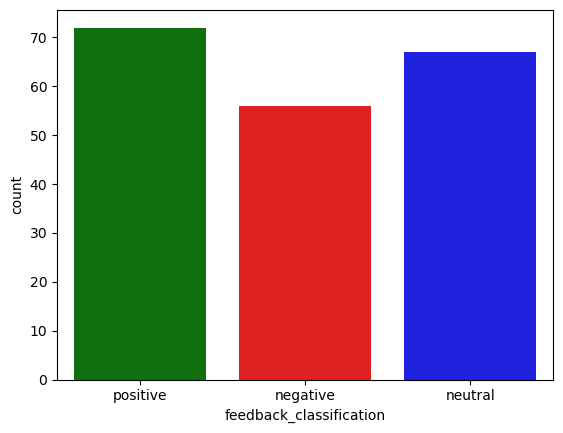

In [ ]:
sns.countplot(x='feedback_classification', data=FeedbackSummary, palette=['g','r','b'])
plt.show()

In [ ]:
min_date = FeedbackSummary['feedback_date'].min()
max_date = FeedbackSummary['feedback_date'].max()

print(min_date)
print(max_date)
date_range = max_date - min_date
date_range

2024-01-01 00:00:00
2024-10-13 00:00:00


Timedelta('286 days 00:00:00')

In [ ]:
date_ranges = []
curr_start_date = min_date
range_duration = pd.Timedelta(days=21)

while curr_start_date < max_date:
    curr_end_date = curr_start_date + range_duration
    if curr_end_date > max_date:
      curr_end_date = max_date
    date_ranges.append((curr_start_date, curr_end_date))
    curr_start_date = curr_end_date

date_ranges

[(Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-22 00:00:00')),
 (Timestamp('2024-01-22 00:00:00'), Timestamp('2024-02-12 00:00:00')),
 (Timestamp('2024-02-12 00:00:00'), Timestamp('2024-03-04 00:00:00')),
 (Timestamp('2024-03-04 00:00:00'), Timestamp('2024-03-25 00:00:00')),
 (Timestamp('2024-03-25 00:00:00'), Timestamp('2024-04-15 00:00:00')),
 (Timestamp('2024-04-15 00:00:00'), Timestamp('2024-05-06 00:00:00')),
 (Timestamp('2024-05-06 00:00:00'), Timestamp('2024-05-27 00:00:00')),
 (Timestamp('2024-05-27 00:00:00'), Timestamp('2024-06-17 00:00:00')),
 (Timestamp('2024-06-17 00:00:00'), Timestamp('2024-07-08 00:00:00')),
 (Timestamp('2024-07-08 00:00:00'), Timestamp('2024-07-29 00:00:00')),
 (Timestamp('2024-07-29 00:00:00'), Timestamp('2024-08-19 00:00:00')),
 (Timestamp('2024-08-19 00:00:00'), Timestamp('2024-09-09 00:00:00')),
 (Timestamp('2024-09-09 00:00:00'), Timestamp('2024-09-30 00:00:00')),
 (Timestamp('2024-09-30 00:00:00'), Timestamp('2024-10-13 00:00:00'))]

In [ ]:
def assign_date_range(date):
    for i, (start, end) in enumerate(date_ranges):
        if start <= date <= end:
            return i
    return 'What?'

In [ ]:
FeedbackSummary['date_range'] = FeedbackSummary['feedback_date'].apply(assign_date_range)
FeedbackSummary

,feedback_text,points_earned,interaction_type,feedback_date,feedback_classification,date_range
0,This product has significantly improved my dai...,1,Email,2024-09-28,positive,12
1,The product broke down after just a few uses.,5,Call,2024-02-26,negative,2
2,The customer service was outstanding.,8,Email,2024-07-08,positive,8
3,Overpriced for what it offers. Not worth the m...,10,Call,2024-10-04,neutral,13
4,Disappointed with the product quality. Not as ...,2,Email,2024-05-21,negative,6
...,...,...,...,...,...,...
190,"ItÆs a solid option, though a few design tweak...",3,Call,2024-07-14,neutral,9
191,"The material quality is okay, but not as durab...",9,Call,2024-02-06,neutral,1
192,"The product is satisfactory, though a few enha...",10,Call,2024-10-13,neutral,13
193,"ItÆs a decent option, but some components feel...",4,Email,2024-07-30,neutral,10


In [ ]:
FeedbackSummary['date_range'].value_counts()


date_range
1     26
10    20
11    16
9     16
12    15
7     14
0     14
2     13
13    13
5     13
6     11
4     10
8      9
3      5
Name: count, dtype: int64

In [ ]:
print(FeedbackSummary['interaction_type'].unique())

['Email' 'Call' 'In-Person']


In [ ]:
FeedbackSummary['interaction_type'].value_counts()

interaction_type
Call         81
Email        74
In-Person    40
Name: count, dtype: int64

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
FeedbackSummary['interaction_type'] = FeedbackSummary['interaction_type'].apply(preprocess_text)
FeedbackSummary['feedback_text'] = FeedbackSummary['feedback_text'].apply(preprocess_text)

In [ ]:
le = LabelEncoder()
FeedbackSummary['interaction_type'] = le.fit_transform(FeedbackSummary['interaction_type'])
FeedbackSummary['feedback_classification'] = le.fit_transform(FeedbackSummary['feedback_classification'])

In [ ]:
FeedbackSummary

,feedback_text,points_earned,interaction_type,feedback_date,feedback_classification,date_range
0,product significantli improv daili routin,1,1,2024-09-28,2,12
1,product broke use,5,0,2024-02-26,0,2
2,custom servic outstand,8,1,2024-07-08,2,8
3,overpr offer worth money,10,0,2024-10-04,1,13
4,disappoint product qualiti advertis,2,1,2024-05-21,0,6
...,...,...,...,...,...,...
190,itæ solid option though design tweak could enh...,3,0,2024-07-14,1,9
191,materi qualiti okay durabl iæd like,9,0,2024-02-06,1,1
192,product satisfactori though enhanc could make ...,10,0,2024-10-13,1,13
193,itæ decent option compon feel littl fragil,4,1,2024-07-30,1,10


In [ ]:
FeedbackSummary['feedback_text'] = FeedbackSummary['feedback_text'].astype(str)

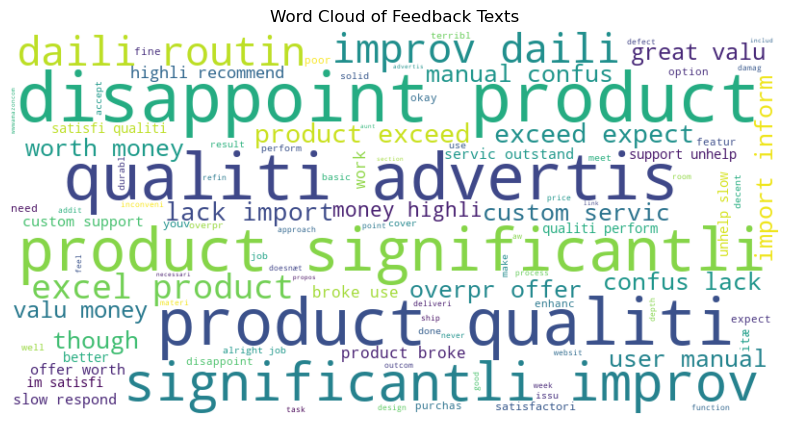

In [ ]:
all_words = ' '.join([text for text in FeedbackSummary['feedback_text']])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback Texts')
plt.show()

In [ ]:
X = FeedbackSummary[['feedback_text']]
y = FeedbackSummary['feedback_classification']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=1000, ngram_range=(1, 2)), 'feedback_text'),

    ],
    remainder='passthrough'
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train['feedback_text'])
X_test_tfidf = vectorizer.transform(X_test['feedback_text'])

In [ ]:
model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000, class_weight='balanced'))
])

model_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=1000))
])

model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier())
])

model_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='linear'))
])

model_adaboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=100))
])

In [ ]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=1000))])

In [ ]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               ena...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', GradientBoostingClassifier(n_estimators=1000))])

In [ ]:
model_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', SVC(kernel='linear', probability=True))])

In [ ]:
model_adaboost.fit(X_train, y_train)

C:\Users\nourh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', AdaBoostClassifier(n_estimators=100))])

In [ ]:
columns=['RandomForestClassifier','GradientBoostingClassifier','XGBoost', 'SVC', 'AdaBoostClassifier']
result1=[]
result2=[]


In [ ]:
def cal(model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    Kfold_scores = []

    for train_index, val_index in kfold.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_val)
        acc_fold = accuracy_score(y_fold_val, y_fold_pred)
        Kfold_scores.append(acc_fold)

    MeanKfold = np.mean(Kfold_scores)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    CR = classification_report(y_test, y_pred)

    result1.append(acc)
    result2.append(MeanKfold)

    print(model)
    print('Accuracy on Test Set: ', acc)
    print('Classification Report on Test Set:\n', CR)
    print(f"KFold Scores: {Kfold_scores}")
    print(f"Mean K-Fold Accuracy: {MeanKfold}")


In [ ]:
def cal(model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    Kfold_scores = []

    for train_index, val_index in kfold.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train, y_fold_train)
        y_fold_pred = model.predict(X_fold_val)
        acc_fold = accuracy_score(y_fold_val, y_fold_pred)
        Kfold_scores.append(acc_fold)

    MeanKfold = np.mean(Kfold_scores)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    CR = classification_report(y_test, y_pred)

    result1.append(acc)
    result2.append(MeanKfold)

    print(model)
    print('Accuracy on Test Set: ', acc)
    print('Classification Report on Test Set:\n', CR)
    print(f"KFold Scores: {Kfold_scores}")
    print(f"Mean K-Fold Accuracy: {MeanKfold}")


In [ ]:
cal(model_rf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=1000))])
Accuracy on Test Set:  0.9
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91         6

    accuracy                           0.90        20
   macro avg       0.93      0.90 

In [ ]:
cal(model_gb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', GradientBoostingClassifier(n_estimators=1000))])
Accuracy on Test Set:  0.95
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

KF

In [ ]:
cal(model_xgb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               ena...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction

In [ ]:
cal(model_svc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', SVC(kernel='linear', probability=True))])
Accuracy on Test Set:  1.0
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

KFold Scor

In [ ]:
cal(model_adaboost)

C:\Users\nourh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nourh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nourh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nourh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nou

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'feedback_text')])),
                ('classifier', AdaBoostClassifier(n_estimators=100))])
Accuracy on Test Set:  0.9
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91         6

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20

KFold Scores

In [ ]:
FR = pd.DataFrame({
    'Algorithm': columns,
    'Accuracy': result1,
    'MeanKFold': result2
})
print(FR)

                    Algorithm  Accuracy  MeanKFold
0      RandomForestClassifier      0.90   0.805714
1  GradientBoostingClassifier      0.95   0.760000
2                     XGBoost      0.95   0.742857
3                         SVC      1.00   0.828571
4          AdaBoostClassifier      0.90   0.702857


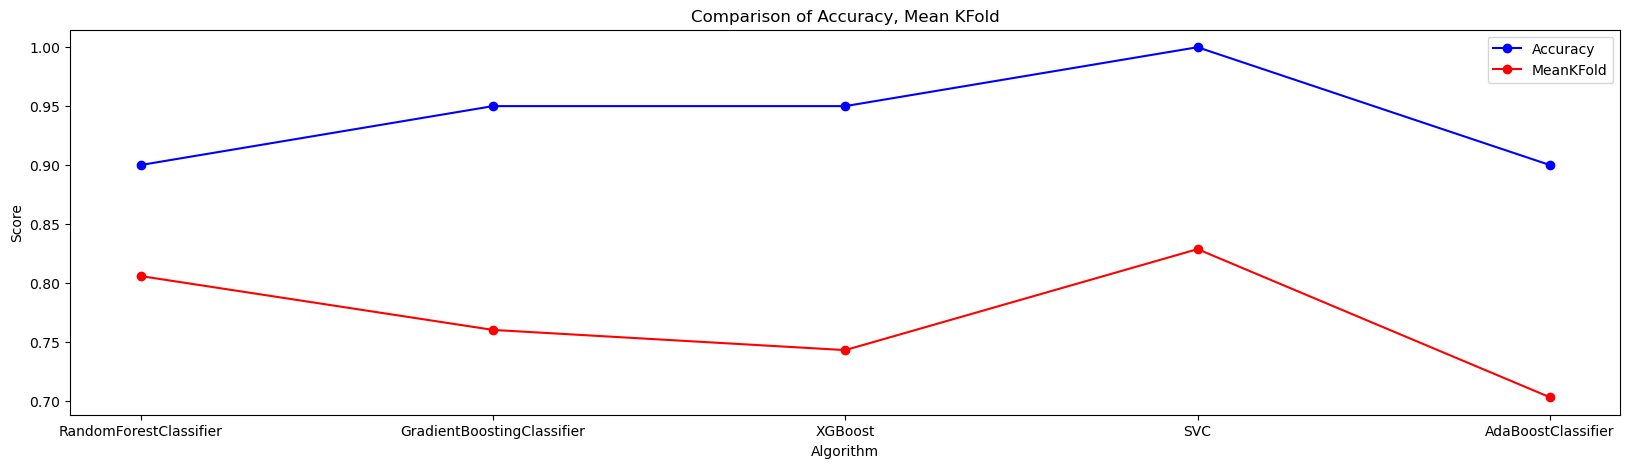

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(FR.Algorithm, FR.Accuracy, label='Accuracy', color='blue', marker='o')
plt.plot(FR.Algorithm, FR.MeanKFold, label='MeanKFold', color='red', marker='o')

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Comparison of Accuracy, Mean KFold')
plt.legend()

plt.show()

In [ ]:
testing_df = pd.read_excel('C:\\Users\\nourh\\Downloads\\e\\feedback_data_modi.xlsx')
testing_df

,feedback_id,customer_id,agent_id,feedback_text,suggestion_text,points_earned,interaction_type,interaction_date,suggestion_date,feedback_date,location_id,time_id
0,1000,114,126,"The product has exceeded my expectations, it's...",Continue maintaining the high standards and qu...,1,Email,2024-01-25,2024-01-23,2024-09-28,14,24
1,1001,960,578,"Unfortunately, the product broke down much soo...",Address the specific issues mentioned to impro...,5,Call,2024-09-11,2024-06-17,2024-02-26,52,86
2,1002,306,507,"The customer service was exceptional, they rea...",Continue maintaining the high standards and qu...,8,Email,2024-04-27,2024-07-26,2024-07-08,64,53
3,1003,140,767,"For the price, I expected more from this produ...",Consider revising the pricing strategy for bet...,10,Call,2024-04-06,2024-03-21,2024-10-04,81,6
4,1004,510,339,The product quality did not meet my expectatio...,Improve product quality to meet customer expec...,2,Email,2024-07-26,2024-05-05,2024-05-21,10,41
5,1005,695,249,The user manual was very confusing and lacked ...,Provide a clearer and more detailed user manual.,10,Call,2024-06-21,2024-06-11,2024-08-30,72,92
6,1006,128,775,The user manual was not user-friendly and lack...,Provide a clearer and more detailed user manual.,10,In-Person,2024-06-16,2024-04-21,2024-04-01,91,67
7,1007,502,153,This product has been a great addition to my d...,Continue maintaining the high standards and qu...,7,Email,2024-04-11,2024-09-07,2024-03-22,16,43
8,1008,293,295,The user manual was confusing and lacked impor...,Provide a clearer and more detailed user manual.,7,Email,2024-03-27,2024-03-21,2024-06-14,11,61
9,1009,513,257,The product quality did not meet my expectatio...,Improve product quality to meet customer expec...,7,Email,2024-08-19,2024-05-14,2024-06-14,82,31


In [ ]:
testing_df['interaction_type'] = testing_df['interaction_type'].apply(preprocess_text)
testing_df['feedback_text'] = testing_df['feedback_text'].apply(preprocess_text)
testing_df['interaction_type'] = le.fit_transform(testing_df['interaction_type'])
testing_df['feedback_text'] = testing_df['feedback_text'].astype(str)

In [ ]:
X_testing = testing_df[['feedback_text']]

In [ ]:
y_testing_pred_svc = model_svc.predict(X_testing)

In [ ]:
testing_df['TARGET'] = y_testing_pred_svc
testing_df

,feedback_id,customer_id,agent_id,feedback_text,suggestion_text,points_earned,interaction_type,interaction_date,suggestion_date,feedback_date,location_id,time_id,TARGET
0,1000,114,126,product exceed expect gamechang daili routin,Continue maintaining the high standards and qu...,1,1,2024-01-25,2024-01-23,2024-09-28,14,24,2
1,1001,960,578,unfortun product broke much sooner expect im d...,Address the specific issues mentioned to impro...,5,0,2024-09-11,2024-06-17,2024-02-26,52,86,0
2,1002,306,507,custom servic except realli went beyond,Continue maintaining the high standards and qu...,8,1,2024-04-27,2024-07-26,2024-07-08,64,53,2
3,1003,140,767,price expect product doesnt seem worth money,Consider revising the pricing strategy for bet...,10,0,2024-04-06,2024-03-21,2024-10-04,81,6,1
4,1004,510,339,product qualiti meet expect promis,Improve product quality to meet customer expec...,2,1,2024-07-26,2024-05-05,2024-05-21,10,41,1
5,1005,695,249,user manual confus lack import detail need improv,Provide a clearer and more detailed user manual.,10,0,2024-06-21,2024-06-11,2024-08-30,72,92,1
6,1006,128,775,user manual userfriendli lack crucial inform,Provide a clearer and more detailed user manual.,10,2,2024-06-16,2024-04-21,2024-04-01,91,67,1
7,1007,502,153,product great addit daili routin im satisfi,Continue maintaining the high standards and qu...,7,1,2024-04-11,2024-09-07,2024-03-22,16,43,2
8,1008,293,295,user manual confus lack import detail need revis,Provide a clearer and more detailed user manual.,7,1,2024-03-27,2024-03-21,2024-06-14,11,61,1
9,1009,513,257,product qualiti meet expect im disappoint purchas,Improve product quality to meet customer expec...,7,1,2024-08-19,2024-05-14,2024-06-14,82,31,0


In [ ]:
import pickle
pickle.dump(model_svc, open('feedback_clf.pkl', 'wb'))